# CS 1656 – Introduction to Data Science 

## Instructor: Alexandros Labrinidis / Teaching Assistant: Tahereh Arabghalizi
### Additional credits: Evangelos Karageorgos, Zuha Agha, Anatoli Shein, Phuong Pham
## Lab11: Regression and Decision Trees

In this lab, we will learn how to do regression and classification with decision trees using scikit-learn python package.

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model, tree, metrics
import matplotlib.pyplot as plt
%matplotlib inline

## Linear Regression
LinearRegression fits a linear model with coefficients w = (w_1, ..., w_p) to minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.

LinearRegression will take in its fit method arrays X, y and will store the coefficients w of the linear model in its coef_ member.

We will now go through an example of linear regression on bike sharing dataset. 

In [2]:
df = pd.read_csv('http://data.cs1656.org/bike_share.csv')
df.head()

,instant,season,hr,holiday,weekday,workingday,weathersit,temp,temp_feels,hum,windspeed,cnt
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


The attributes of the dataset are as follows:

    - instant: record index
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week (0 to 6)
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear
		- 2: Misty, Cloudy
		- 3: Light Snow, Light Rain
		- 4: Heavy Rain, Ice Pallets
	- temp : Normalized temperature in Celsius. The values are divided by 41 (max)
	- temp_feels: Normalized feeling temperature in Celsius. The values are divided by 50 (max)
	- hum: Normalized humidity. The values are divided by 100 (max)
	- windspeed: Normalized wind speed. The values are divided by 67 (max)
	- cnt: count of total rental bikes including both casual and registered

Our target variable, `y`, is _cnt_. We will use a single attribute as input feature for this example and will select _temp_ as our input feature `X`. You will be using all attributes in one of your tasks. 

### Subsample
As our dataset consists of more than 17000 rows, we will randomly subsample our dataset to select 1000 rows.

In [3]:
df_subsample = df.sample(1000)
df_subsample.head()

,instant,season,hr,holiday,weekday,workingday,weathersit,temp,temp_feels,hum,windspeed,cnt
10007,10008,1,0,0,1,1,1,0.26,0.2424,0.60,0.2537,29
4394,4395,3,0,0,4,1,1,0.66,0.5909,0.89,0.1343,35
7386,7387,4,9,0,3,1,1,0.34,0.3636,0.93,0.0000,219
4954,4955,3,8,0,6,0,1,0.78,0.7424,0.59,0.2239,114
16802,16803,4,21,0,5,1,2,0.36,0.3636,0.93,0.1045,171


### Train & Test Split
We will split the subsample into 90% training set and 10% test set by slicing the first 900 rows for training and using the rest for testing. As fit takes numpy arrays as input we will use _values_ function to convert our Dataframe column into numpy array and use double brackets in order to make the arrays two-dimensional.

In [4]:
train = df_subsample.iloc[1:900]
train_x = train[['temp']].values
train_y = train[['cnt']].values

test=df_subsample.iloc[901:]
test_x = test[['temp']].values
test_y = test[['cnt']].values
print (type(train_x), type(train_y), type(test_x), type(test_y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


### Fit
To fit our linear regression model, apply the following function. Note that the fit function takes numpy array of the format [num_samples,num_features].

In [5]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now that we have fit our linear regression model onto the training data, our estimated model coefficients are stored in _coeff_ attribute of our model.

In [6]:
# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[379.20718836]]


### Predict
We will now use our trained linear regression model to make predictions on our test set. Our model will take temperature attribute, _temp_, of our test data and will make predictions on the count of people who are bike sharing, given by _cnt_.

In [7]:
predict_y = regr.predict(test_x)
# Printing  predicted and actual values side by side fro comparison
np.column_stack((predict_y,test_y))

array([[ 98.28664521,  62.        ],
       [128.62322028,  82.        ],
       [143.79150781,  29.        ],
       [166.54393911, 579.        ],
       [196.88051418,  69.        ],
       [113.45493274,  23.        ],
       [136.20736404,  40.        ],
       [295.47438315, 469.        ],
       [234.80123302,  16.        ],
       [ 37.61349507,   4.        ],
       [105.87078898, 267.        ],
       [ 45.19763884,  15.        ],
       [219.63294548, 347.        ],
       [227.21708925,  96.        ],
       [105.87078898,  94.        ],
       [128.62322028, 271.        ],
       [265.13780809, 153.        ],
       [ 52.78178261,  29.        ],
       [227.21708925,   7.        ],
       [166.54393911, 138.        ],
       [280.30609562, 233.        ],
       [ 83.11835767,  41.        ],
       [234.80123302,  96.        ],
       [ 90.70250144,  31.        ],
       [ 98.28664521,   3.        ],
       [234.80123302, 779.        ],
       [143.79150781,   1.        ],
 

### Mean Squared Error
Looks like some of our model's predictions are not good. Now, let's measure the difference between our predicted and actual values by calculating the mean squared error. 

In [8]:
meansq_error = np.mean((predict_y - test_y) ** 2)
print ("Mean squared error: %.2f" % meansq_error)

Mean squared error: 30867.07


As expected our mean squared error is high, which means our model is not good. Can we improve it? What if we use more training data? Or more features? 
### Plot
We can also visualize the difference between our predictions and actual values by plotting.

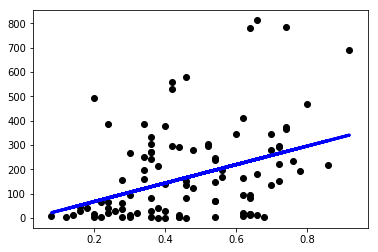

In [9]:
plt.scatter(test_x, test_y,  color='black', linewidth=1)
plt.plot(test_x, predict_y, color='blue', linewidth=3)
plt.show()

## Decision Trees
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

We will go through an example of binary classfication using decision trees on titanic survival dataset.

In [10]:
dt = pd.read_csv('http://data.cs1656.org/titanic.csv')
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S


The attributes of the dataset are as follows:
    - survival        Survival
                    (0 = No; 1 = Yes)
    - pclass          Passenger Class
                    (1 = 1st; 2 = 2nd; 3 = 3rd)
    - name            Name
    - sex             Sex
    - age             Age
    - sibsp           Number of Siblings/Spouses Aboard
    - parch           Number of Parents/Children Aboard
    - embarked        Port of Embarkation
                    (C = Cherbourg; Q = Queenstown; S = Southampton)
Our target class variable is _Survived_, whether  the passenger survived or not. We will use only a subset of attributes that take discreet values to build our decision tree.

To fit a decision tree model, we will have to convert the categoricalvalues into numerical values. As the only categorical attribute we will use is _Sex_, we will only need to convert that column into numerical values using the following commands. 

In [11]:
dt['Sex'] = dt['Sex'].replace(['female', 'male'], [1, 2])
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",2,22.0,1,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,S
4,5,0,3,"Allen, Mr. William Henry",2,35.0,0,0,S


### Train & Test Split
We will split our data into train and test set using the first 800 rows for training and the rest for testing.

In [12]:
dt_train_x = dt.iloc[:800][['Pclass','Sex','SibSp']].values
dt_train_y = dt.iloc[:800][['Survived']].values

dt_test_x = dt.iloc[801:][['Pclass','Sex','SibSp']].values
dt_test_y = dt.iloc[801:][['Survived']].values

### Fit
We will now fit our decision tree model onto the training set.

In [13]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(dt_train_x, dt_train_y)

### Predict

In [14]:
dt_predict_y = clf.predict(dt_test_x)
## comparing predicted and actual values
np.column_stack((dt_predict_y,dt_test_y))

array([[1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0,

### Accuracy
We can measure the accuracy of our prediction by using the following commands.

In [15]:
accuracy = metrics.accuracy_score(dt_test_y,dt_predict_y)
accuracy

0.8

## Tasks

** Task 1** 

Do linear regression over a sample of 1000 rows of bike share counts, _cnt_, using _weekday_, as input feature. Calculate the mean squared error by using first 900 rows for training and the rest for testing. Plot the results on a scatter plot.

** Task 2**

Repeat Task 1 using all atttributes except instant (also, scatter plot is not required in this task). Is the mean squared error higher or lower? Is it better to use all attributes?

** Task 3**

You will use bank-data.csv as input for this task. Use decision trees to do binary classification of mortgage{yes,no} using region, sex and married attributes as input features. Use the first 500 rows for training and the rest for testing. Measure the accuracy of your classification. 